# Static



By now you're familiar with the typical use of linear regression: you're given a dataframe with a bunch of features and a set of observations for each feature. You then take one feature (your y) and try to predict it based on other features (your x's). 

This generally works to a certain extent. This morning, though, we're going to set up a rather strange problem for linear regression. We will see what happens when y and the x's are totally unrelated.

Recall that regression follows the formula 
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \epsilon
$$ 
When we "fit" an OLS model we are giving the model all of the x's and the y and asking it to find the best betas.

This time, however, we're going to set all the betas to zero 
$$
\beta_0=\beta_1=\dots=0
$$
and then fit an OLS model.

Before we do this, stop and think for a second:

- What do you expect the model to do? What will the betas/r-squared/p-values that it finds look like?
- What do you think the model *should* do? Is that different from what you think it *will* do?

![](https://upload.wikimedia.org/wikipedia/commons/5/5a/No_Signal_23.JPG)

# Part 1

Generate simulation data. We want to have 200 points (observations) for the y feature and for 20 x features. In other words make sure `y.shape == (200,1)` and `x.shape == (200,20)`. The x's should be randomly generated independent of each other. And the y should be randomly generated independent of the x's. 

Use statsmodels to fit an OLS model to your data. Are the results as you expected? Do you have any betas with a $p<0.05$? If not, re-run the model until you do.

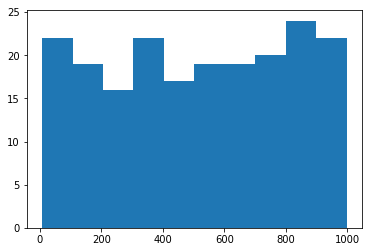

[207,
 48,
 982,
 78,
 400,
 877,
 312,
 671,
 573,
 171,
 404,
 792,
 663,
 572,
 907,
 731,
 100,
 337,
 952,
 814,
 488,
 785,
 131,
 211,
 542,
 866,
 155,
 889,
 393,
 881,
 730,
 325,
 994,
 309,
 285,
 704,
 641,
 254,
 841,
 692,
 107,
 83,
 129,
 65,
 983,
 868,
 653,
 330,
 745,
 128,
 412,
 349,
 478,
 779,
 341,
 295,
 347,
 836,
 596,
 920,
 754,
 985,
 490,
 447,
 929,
 146,
 19,
 613,
 355,
 232,
 219,
 902,
 382,
 591,
 166,
 389,
 383,
 102,
 3,
 115,
 872,
 387,
 960,
 901,
 6,
 138,
 942,
 607,
 261,
 55,
 30,
 953,
 445,
 958,
 410,
 367,
 904,
 932,
 350,
 624,
 436,
 861,
 467,
 283,
 343,
 205,
 50,
 227,
 813,
 990,
 828,
 782,
 805,
 61,
 790,
 715,
 842,
 728,
 405,
 622,
 255,
 124,
 320,
 190,
 344,
 504,
 216,
 812,
 244,
 637,
 1,
 928,
 429,
 184,
 231,
 804,
 239,
 755,
 617,
 267,
 631,
 713,
 70,
 853,
 701,
 605,
 266,
 9,
 569,
 314,
 800,
 826,
 179,
 878,
 268,
 482,
 967,
 408,
 739,
 466,
 993,
 559,
 134,
 644,
 85,
 462,
 286,
 882,
 438,
 348,

In [10]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

y = random.sample(range(1, 1000), 200)
plt.hist(y)
plt.show()


In [9]:
df_y = pd.DataFrame(y)
df_y.shape

(200, 1)

In [59]:

'''
plt.hist(x)
plt.show()
df_x = pd.DataFrame(x)
df_x.shape
'''

def generate_x_matrix(num_of_features, length):
    x = []
    for i in range(length):
        x.append(random.sample(range(1, num_of_features*10), num_of_features)) # Creates a row
    df = pd.DataFrame(x)
    df.columns = ['X'+str(c) for c in df.columns]
    assert len(df) == length
    return df

In [62]:
df_x = generate_x_matrix(200, length=200)
df_x.tail()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199
195,1373,959,829,82,1868,821,682,929,1481,252,...,218,1817,1343,1959,287,24,12,461,1479,1050
196,1293,341,1837,1940,322,306,1612,188,1049,370,...,1576,194,1563,385,1382,142,253,1623,482,369
197,1016,422,1146,1978,1790,1757,552,1214,277,1161,...,399,20,1455,625,1573,407,330,1342,58,156
198,1875,1212,1046,1190,1265,267,1300,1418,1621,1283,...,372,928,1257,738,1712,1956,952,1508,1924,500
199,1424,1920,686,1652,1665,1851,1598,1076,675,1021,...,616,1110,923,696,812,1341,1501,1293,1728,1381


In [76]:
def make_formula(df):
    f = 'Y ~ '
    for i in df.columns[:-1]:
        f += str(i) + '+'
    f = f[:-1]
    return f


In [32]:
lm = smf.ols(f, data=df)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     XY   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.063
Date:                Thu, 12 Jul 2018   Prob (F-statistic):              0.392
Time:                        09:23:18   Log-Likelihood:                -1400.9
No. Observations:                 200   AIC:                             2844.
Df Residuals:                     179   BIC:                             2913.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    218.2762    175.164      1.246      0.214    -127.375     563.927
X0            -0.0009      0.074     -0.012      0.991      -0.146       0.144
X1             0.0376      0.070      0.535      0.594      -0.101       0.176
X2             0.0011      0.076      0.014      0.989      -0.150       0.152
X3            -0.0507      0.074     -0.686      0.493      -0.196       0.095
X4             0.0989      0.071      1.401      0.163      -0.040       0.238
X5             0.0631      0.076      0.825      0.410      -0.088       0.214
X6             0.0829      0.075      1.098      0.274      -0.066       0.232
X7            -0.1062      0.072     -1.483      0.140      -0.248       0.035
X8            -0.0245      0.072     -0.338      0.736      -0.167       0.118
X9            -0.0507      0.071     -0.711      0.478      -0.191       0.090
X10           -0.0797      0.072     -1.105      0.270      -0.222       0.063
X11            0.0762      0.072      1.059      0.291      -0.066       0.218
X12            0.1363      0.076      1.791      0.075      -0.014       0.286
X13            0.1169      0.072      1.616      0.108      -0.026       0.260
X14            0.0590      0.073      0.809      0.420      -0.085       0.203
X15           -0.0266      0.073     -0.367      0.714      -0.170       0.116
X16            0.0880      0.068      1.284      0.201      -0.047       0.223
X17           -0.0253      0.075     -0.338      0.736      -0.173       0.122
X18            0.1525      0.072      2.108      0.036       0.010       0.295
X19           -0.0429      0.079     -0.545      0.587      -0.198       0.112
==============================================================================
Omnibus:                       10.219   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.813
Skew:                           0.113   Prob(JB):                       0.0901
Kurtosis:                       2.274   Cond. No.                     1.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Part 2

Now, automate the process! Run the above analysis but vary the number of x's from 1 to 200. Log the r2 and r2-adj for each case and plot them

In [97]:
num_of_features = random.sample(range(1, 200), 10)
summaries = []
fits = []
models = []
for nof in num_of_features:
    #print(nof, "Features")
    df = generate_x_matrix(nof, length = 200)
    df['Y'] = df_y
    f = make_formula(df)
    #print(f)
    lm = smf.ols(f, data=df)
    models.append(lm)
    fit = lm.fit()
    fits.append(fit)
    summaries.append(fit.summary())
#summaries

# X-axis = num_of_features, 98 X's, 20 X's,....
# Y-axis = r2
# Y-axis = r2-adj


In [103]:
r2_y = [f.rsquared for f in fits]
r2a_y = [f.rsquared_adj for f in fits]

#r2a_y = [s for s in summaries]

#plt.scatter(num)
# statsmodels.regression.linear_model.RegressionResultsWrapper

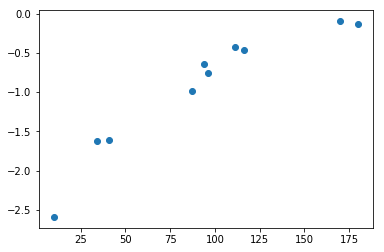

In [109]:
import math
plt.scatter(num_of_features, [math.log(y) for y in r2_y])

In [111]:
plt.scatter(num_of_features, [math.log(y) for y in r2a_y])

ValueError: math domain error